<a href="https://colab.research.google.com/github/salmabk3/ADAS-Pedestrian-Detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===== SETUP COLAB =====
#a chaque nouvelle session il faut executer cette partie
!pip install ultralytics opencv-python pandas

!git clone https://github.com/salmabk3/ADAS-Pedestrian-Detection.git
%cd ADAS-Pedestrian-Detection

import os, sys
sys.path.insert(0, os.path.abspath("src"))

from yolo import YoloDetector
print("✅ Environment ready")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00
Cloning into 'ADAS-Pedestrian-Detection'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 81 (delta 38), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (81/81), 730.64 KiB | 11.24 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/ADAS-Pedestrian-Detection
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Environment ready


Installation des dependances


In [2]:
!pip install ultralytics opencv-python pandas


Se connecter a google drive pour acceder au dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Cloner le projet github

In [4]:
!git clone https://github.com/salmabk3/ADAS-Pedestrian-Detection.git




Cloning into 'ADAS-Pedestrian-Detection'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 81 (delta 38), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (81/81), 730.64 KiB | 11.24 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [5]:
!ls


ADAS-Pedestrian-Detection  data  main.ipynb  README.md	requirements.txt  src


In [6]:
%cd ADAS-Pedestrian-Detection
!pwd
!ls


/content/ADAS-Pedestrian-Detection/ADAS-Pedestrian-Detection
/content/ADAS-Pedestrian-Detection/ADAS-Pedestrian-Detection
data  main.ipynb  README.md  requirements.txt  src


In [7]:
# ===== IMPORT DES MODULES DU PROJET =====
import os
import sys

print("Current directory:", os.getcwd())
print("Project files:", os.listdir("."))

SRC_PATH = os.path.abspath("src")
print("SRC_PATH =", SRC_PATH)

sys.path.insert(0, SRC_PATH)

from yolo import YoloDetector

print("✅ Import YoloDetector OK")


Current directory: /content/ADAS-Pedestrian-Detection/ADAS-Pedestrian-Detection
Project files: ['.git', '.gitignore', 'src', 'README.md', 'data', 'requirements.txt', 'main.ipynb']
SRC_PATH = /content/ADAS-Pedestrian-Detection/ADAS-Pedestrian-Detection/src
✅ Import YoloDetector OK



# Chargement des modèles

YOLO pour la détection de piétons

In [8]:
%cd /content
!pwd
!ls




/content
/content
ADAS-Pedestrian-Detection  drive  sample_data


In [9]:
IMAGE_DIR = "/content/drive/MyDrive/ADAS-DATASET/images"
OUT_IMG   = "/content/drive/MyDrive/ADAS-DATASET/results/yolo_images"
OUT_CSV   = "/content/drive/MyDrive/ADAS-DATASET/results/yolo_csv"

os.makedirs(OUT_IMG, exist_ok=True)
os.makedirs(OUT_CSV, exist_ok=True)


In [10]:
import cv2
import pandas as pd

# Initialisation YOLO (pré-entraîné)
detector = YoloDetector(model_name="yolov8n.pt")

rows = []  # pour le CSV final

image_files = [f for f in os.listdir(IMAGE_DIR)
               if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"🔎 Nombre total d'images : {len(image_files)}")

for img_name in image_files:
    img_path = os.path.join(IMAGE_DIR, img_name)
    img = cv2.imread(img_path)

    if img is None:
        print(f"Image ignorée : {img_name}")
        continue

    boxes = detector.detect(img)

    for i, box in enumerate(boxes):
        x1, y1, x2, y2, conf, cls = box

        # Dessiner bounding box
        cv2.rectangle(img, (int(x1), int(y1)),
                           (int(x2), int(y2)),
                           (0, 255, 0), 2)

        cv2.putText(img, f"person {conf:.2f}",
                    (int(x1), int(y1) - 8),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 255, 0), 2)

        # Enregistrer dans le CSV
        rows.append({
            "image": img_name,
            "bbox_id": i,
            "x1": float(x1),
            "y1": float(y1),
            "x2": float(x2),
            "y2": float(y2),
            "confidence": float(conf)
        })

    # Sauvegarder l'image annotée
    cv2.imwrite(os.path.join(OUT_IMG, img_name), img)

    print(f"{img_name} → {len(boxes)} piéton(s) détecté(s)")


Chargement de YOLO (yolov8n.pt)...
🔎 Nombre total d'images : 1086
0000000048 (1).png → 1 piéton(s) détecté(s)
0000000055 (2).png → 1 piéton(s) détecté(s)
0000000056 (2).png → 0 piéton(s) détecté(s)
0000000049 (1).png → 1 piéton(s) détecté(s)
0000000038.png → 1 piéton(s) détecté(s)
0000000057 (2).png → 0 piéton(s) détecté(s)
0000000039.png → 1 piéton(s) détecté(s)
0000000050 (1).png → 1 piéton(s) détecté(s)
0000000040.png → 1 piéton(s) détecté(s)
0000000058 (2).png → 0 piéton(s) détecté(s)
0000000051 (1).png → 2 piéton(s) détecté(s)
0000000059 (2).png → 0 piéton(s) détecté(s)
0000000052 (1).png → 2 piéton(s) détecté(s)
0000000041.png → 3 piéton(s) détecté(s)
0000000042.png → 2 piéton(s) détecté(s)
0000000060 (2).png → 0 piéton(s) détecté(s)
0000000043.png → 3 piéton(s) détecté(s)
0000000061 (2).png → 0 piéton(s) détecté(s)
0000000053 (1).png → 1 piéton(s) détecté(s)
0000000054 (1).png → 1 piéton(s) détecté(s)
0000000062 (2).png → 0 piéton(s) détecté(s)
0000000044.png → 2 piéton(s) détec

Vérification VISUELLE d’une image avec YOLO

Nombre de piétons détectés : 0


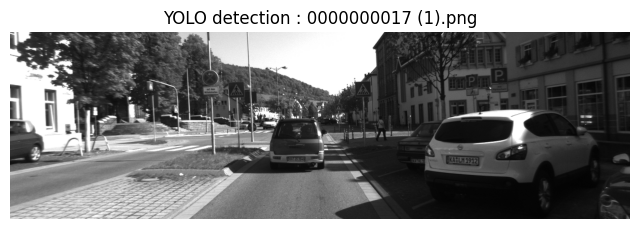

In [11]:
import cv2
import matplotlib.pyplot as plt
import os

# Chemins
IMAGE_NAME = "0000000017 (1).png"
IMAGE_PATH = os.path.join(IMAGE_DIR, IMAGE_NAME)

# Charger l'image
img = cv2.imread(IMAGE_PATH)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Détection YOLO
boxes = detector.detect(img)

print(f"Nombre de piétons détectés : {len(boxes)}")

# Dessiner les bounding boxes
for box in boxes:
    x1, y1, x2, y2, conf, cls = box
    cv2.rectangle(
        img_rgb,
        (int(x1), int(y1)),
        (int(x2), int(y2)),
        (0, 255, 0),
        2
    )
    cv2.putText(
        img_rgb,
        f"person {conf:.2f}",
        (int(x1), int(y1) - 8),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (0, 255, 0),
        2
    )

# Affichage
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"YOLO detection : {IMAGE_NAME}")
plt.show()


In [12]:
df = pd.DataFrame(rows)
csv_path = os.path.join(OUT_CSV, "yolo_detections.csv")
df.to_csv(csv_path, index=False)

print(f"Résultats sauvegardés : {csv_path}")
print(f"Nombre total de détections : {len(df)}")


Résultats sauvegardés : /content/drive/MyDrive/ADAS-DATASET/results/yolo_csv/yolo_detections.csv
Nombre total de détections : 168


# PARTIE 2: Modele de Profondeur

on utilisera MiDas pour estimation de profondeur/ estimaer la distance entre vehicule et pieton(relative)

Méthode

Pour chaque bounding box YOLO :

Extraire la zone correspondante dans la depth map

Prendre :

la moyenne

ou la médiane

ou la valeur au centre du bounding box

In [14]:
import torch

# Charger MiDaS
midas = torch.hub.load(
    "intel-isl/MiDaS",
    "MiDaS_small",
    trust_repo=True
)

midas.eval()

# Charger les transformations
midas_transforms = torch.hub.load(
    "intel-isl/MiDaS",
    "transforms",
    trust_repo=True
)

transform = midas_transforms.small_transform

print("✅ MiDaS (MiDaS_small) loaded correctly")


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


/usr/local/lib/python3.12/dist-packages/torch/hub.py:335: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_lite3-b733e338.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_lite3-b733e338.pth
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v2_1/midas_v21_small_256.pt" to /root/.cache/torch/hub/checkpoints/midas_v21_small_256.pt


100%|██████████| 81.8M/81.8M [00:01<00:00, 69.3MB/s]


✅ MiDaS (MiDaS_small) loaded correctly


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


on teste la profondeur sur une image


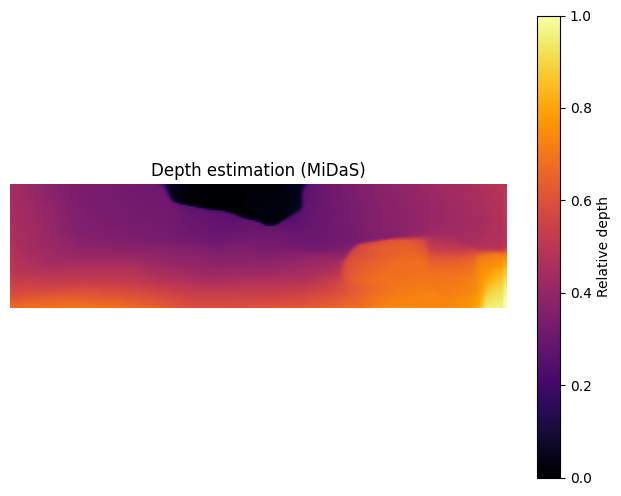

In [16]:
import numpy as np

# Préparation image pour MiDaS
input_batch = transform(img_rgb)


with torch.no_grad():
    prediction = midas(input_batch)

depth_map = prediction.squeeze().cpu().numpy()

# Normalisation pour affichage
depth_map_norm = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())

plt.figure(figsize=(8,6))
plt.imshow(depth_map_norm, cmap='inferno')
plt.colorbar(label="Relative depth")
plt.title("Depth estimation (MiDaS)")
plt.axis("off")
plt.show()


Carte de profondeur relative

Couleurs claires (jaune / orange) → objets proches

Couleurs foncées (violet / noir) → objets loin

L’échelle 0 → 1 est relative, pas en mètres

--> MiDaS ne donne PAS une distance réelle, mais un ordre de profondeur.

# Associer distance + bounding box (clé ADAS)

Principe :

prendre le centre de la bounding box

lire la valeur de profondeur

convertir en distance relative